In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_json("https://pomber.github.io/covid19/timeseries.json")

In [3]:
#taking a look at the structure of data for a specefic country
data["US"].head()

0    {'date': '2020-1-22', 'confirmed': 1, 'deaths'...
1    {'date': '2020-1-23', 'confirmed': 1, 'deaths'...
2    {'date': '2020-1-24', 'confirmed': 2, 'deaths'...
3    {'date': '2020-1-25', 'confirmed': 2, 'deaths'...
4    {'date': '2020-1-26', 'confirmed': 5, 'deaths'...
Name: US, dtype: object

In [4]:
#the objective is to create a table of countries and dates as columns with confirmed cases as values
data_to_use = pd.DataFrame()

In [5]:
#creating a dates column

#making a list of countries
countries = data.columns

dates = []
for x,y in zip(range(0,len(data)),countries):
    date_extracted = data[y][x]["date"]
    dates.append(date_extracted)
data_to_use["date"]=dates

In [6]:

#adding ccountries as columns
for i in countries:
    data_to_use[i] = 0
    data_to_use[i] = data_to_use[i].astype(float)

In [7]:
#updating values of cells to confirmed cases
for country in countries:
    for x in range(0,len(data)):
        data_to_use.at[x,country] = data[country][x]["confirmed"]
    

In [8]:
#previewing results
for i in countries:
    data_to_use[i].astype(float)
data_to_use.tail(20)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
82,2020-4-13,665.0,467.0,1983.0,646.0,19.0,23.0,2208.0,1039.0,6351.0,...,13.0,5.0,10.0,16.0,4.0,6.0,4.0,1.0,0.0,0.0
83,2020-4-14,714.0,475.0,2070.0,659.0,19.0,23.0,2277.0,1067.0,6415.0,...,13.0,5.0,11.0,16.0,4.0,6.0,4.0,1.0,0.0,0.0
84,2020-4-15,784.0,494.0,2160.0,673.0,19.0,23.0,2443.0,1111.0,6440.0,...,13.0,5.0,13.0,16.0,4.0,6.0,4.0,1.0,0.0,0.0
85,2020-4-16,840.0,518.0,2268.0,673.0,19.0,23.0,2571.0,1159.0,6462.0,...,15.0,5.0,15.0,16.0,4.0,6.0,4.0,1.0,0.0,0.0
86,2020-4-17,906.0,539.0,2418.0,696.0,19.0,23.0,2669.0,1201.0,6522.0,...,15.0,5.0,26.0,17.0,4.0,6.0,4.0,1.0,0.0,0.0
87,2020-4-18,933.0,548.0,2534.0,704.0,24.0,23.0,2758.0,1248.0,6568.0,...,15.0,5.0,30.0,17.0,4.0,6.0,4.0,1.0,0.0,0.0
88,2020-4-19,996.0,562.0,2629.0,713.0,24.0,23.0,2839.0,1291.0,6610.0,...,20.0,5.0,35.0,17.0,4.0,6.0,4.0,1.0,0.0,0.0
89,2020-4-20,1026.0,584.0,2718.0,717.0,24.0,23.0,2941.0,1339.0,6623.0,...,20.0,5.0,43.0,17.0,4.0,6.0,4.0,1.0,0.0,0.0
90,2020-4-21,1092.0,609.0,2811.0,717.0,24.0,23.0,3031.0,1401.0,6645.0,...,20.0,5.0,50.0,18.0,4.0,6.0,4.0,1.0,0.0,0.0
91,2020-4-22,1176.0,634.0,2910.0,723.0,25.0,24.0,3144.0,1473.0,6652.0,...,22.0,11.0,61.0,23.0,4.0,6.0,4.0,1.0,0.0,0.0


In [9]:
cases_data_to_use_t = data_to_use.set_index(data_to_use["date"])
cases_data_to_use_t = data_to_use.transpose(copy = True)
cases_data_to_use_t.reset_index()
cases_data_to_use_t.to_csv("cases_data_to_use_t.csv", index_label = False)

In [10]:
#creating a new cases df
new_cases_to_use = data_to_use.copy()

#updating values to new cases
for country in countries:
    for x in range(1,len(data)):
        if data_to_use[country][x-1] != 0:
            new_cases_to_use.at[x,country] = data_to_use[country][x] - data_to_use[country][x-1]
        else: 
            new_cases_to_use.at[x,country] = data_to_use[country][x]
new_cases_to_use["Japan"]

0        2.0
1        0.0
2        0.0
3        0.0
4        2.0
       ...  
97    -417.0
98     159.0
99     193.0
100    217.0
101    266.0
Name: Japan, Length: 102, dtype: float64

In [11]:
#creating a growth factor df
growth_data_to_use = new_cases_to_use.copy()

In [12]:
#updating values to growth factor
for country in countries:
    for x in range(1,len(data)):
        if new_cases_to_use[country][x-1] != 0:
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x] / new_cases_to_use[country][x-1]
        else: 
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x]

In [13]:
growth_data_to_use["Bahrain"].tail(10)

92     3.518519
93     1.584211
94     0.232558
95     0.842857
96     1.288136
97     1.157895
98     1.250000
99     1.081818
100    1.092437
101    0.876923
Name: Bahrain, dtype: float64

In [14]:
growth_data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
0,2020-1-22,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,2020-1-23,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2020-1-24,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2020-1-25,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,2020-1-26,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,4.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2020-4-28,0.726744,1.400000,0.977778,0.0,0.000000,0.0,1.117117,0.951613,3.285714,...,1.0,0.0,11.000000,0.0,28.0,0.0,4.000000,0.0,0.0,0.0
98,2020-4-29,0.888000,1.142857,1.507576,0.0,0.000000,0.0,1.274194,1.101695,0.347826,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,5.0,0.0,0.0
99,2020-4-30,2.090090,0.437500,0.793970,2.0,0.000000,0.0,0.905063,2.061538,1.750000,...,0.0,0.0,20.000000,1.0,1.0,0.0,6.000000,0.0,1.0,15.0
100,2020-5-1,0.706897,1.285714,0.936709,0.0,3.000000,1.0,0.727273,0.611940,0.857143,...,0.0,0.0,0.600000,0.0,10.0,0.0,0.333333,1.0,0.0,0.0


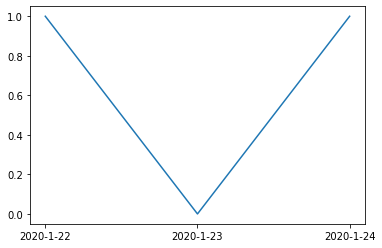

In [15]:
#plotting the data to preview
plt.plot(growth_data_to_use["date"][:3], growth_data_to_use["US"][:3] )

In [16]:
#saving growth as json
growth_data_to_use.to_json("growth.json")
#saving growth as csv
growth_data_to_use.to_csv("growth.csv")

In [17]:
#creating a decision tree for a tabel with an analysis of each country's infection rate
up_country = []
growth_factor = []
cases = []
analysis = []
avg_growth_factor_past_2_days = []
new_cases = []
for country in countries:

        
        if data_to_use[country][len(data)-10] == 0:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("New to The Pandemic") 
        elif data_to_use[country][len(data)-1] < 229 and growth_data_to_use[country][len(data)-1] <= 2 or (new_cases_to_use[country][len(data)-7] ==0 and new_cases_to_use[country][len(data)-3] ==0 and new_cases_to_use[country][len(data)-1] == 0):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Can Be Contained!")
        elif data_to_use[country][len(data)-1] < 2000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 2000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] < 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 3000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1 and new_cases_to_use[country][len(data)-1] <229):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif (data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1] >1) or new_cases_to_use[country][len(data)-1] >229)) or (new_cases_to_use[country][len(data)-30] >0 and growth_data_to_use[country][len(data)-1]>1.5):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Has Gotten Out of Control!")
        else:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("Analysis is Pending Additional Data")



      
    
growth_chart_df = pd.DataFrame()
growth_chart_df["country"] = up_country
growth_chart_df["growth_factor"]= growth_factor
growth_chart_df["cases"]= cases
growth_chart_df["analysis"]= analysis
growth_chart_df["growth_factor_mod"]= avg_growth_factor_past_2_days
growth_chart_df["new_cases"] = new_cases


In [18]:
#checking the output snapshot, reviewing if the analysis falls in correctly and no rows are missed
growth_chart_df.sort_values(by = "cases")

,country,growth_factor,cases,analysis,growth_factor_mod,new_cases
185,Comoros,2.000000,3.0,New to The Pandemic,1.000000,2.0
182,Western Sahara,0.000000,6.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
18,Bhutan,0.000000,7.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
96,Mauritania,0.000000,8.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
116,Papua New Guinea,0.000000,8.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
...,...,...,...,...,...,...
56,France,202.166667,168518.0,COVID-19 Spread Has Gotten Out of Control!,101.087302,1213.0
154,United Kingdom,0.776112,183500.0,COVID-19 Spread Has Gotten Out of Control!,0.901632,4815.0
77,Italy,0.966921,209328.0,COVID-19 Spread Has Gotten Out of Control!,1.008300,1900.0
138,Spain,3147.000000,216582.0,COVID-19 Spread Has Gotten Out of Control!,1573.500000,3147.0


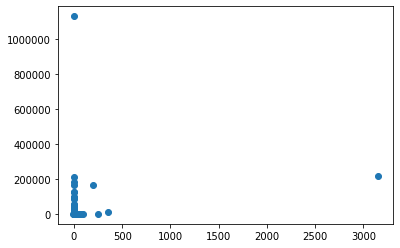

In [19]:
plt.scatter(growth_chart_df["growth_factor"],growth_chart_df["cases"])

In [20]:
growth_chart_df.to_csv("growth_category.csv")